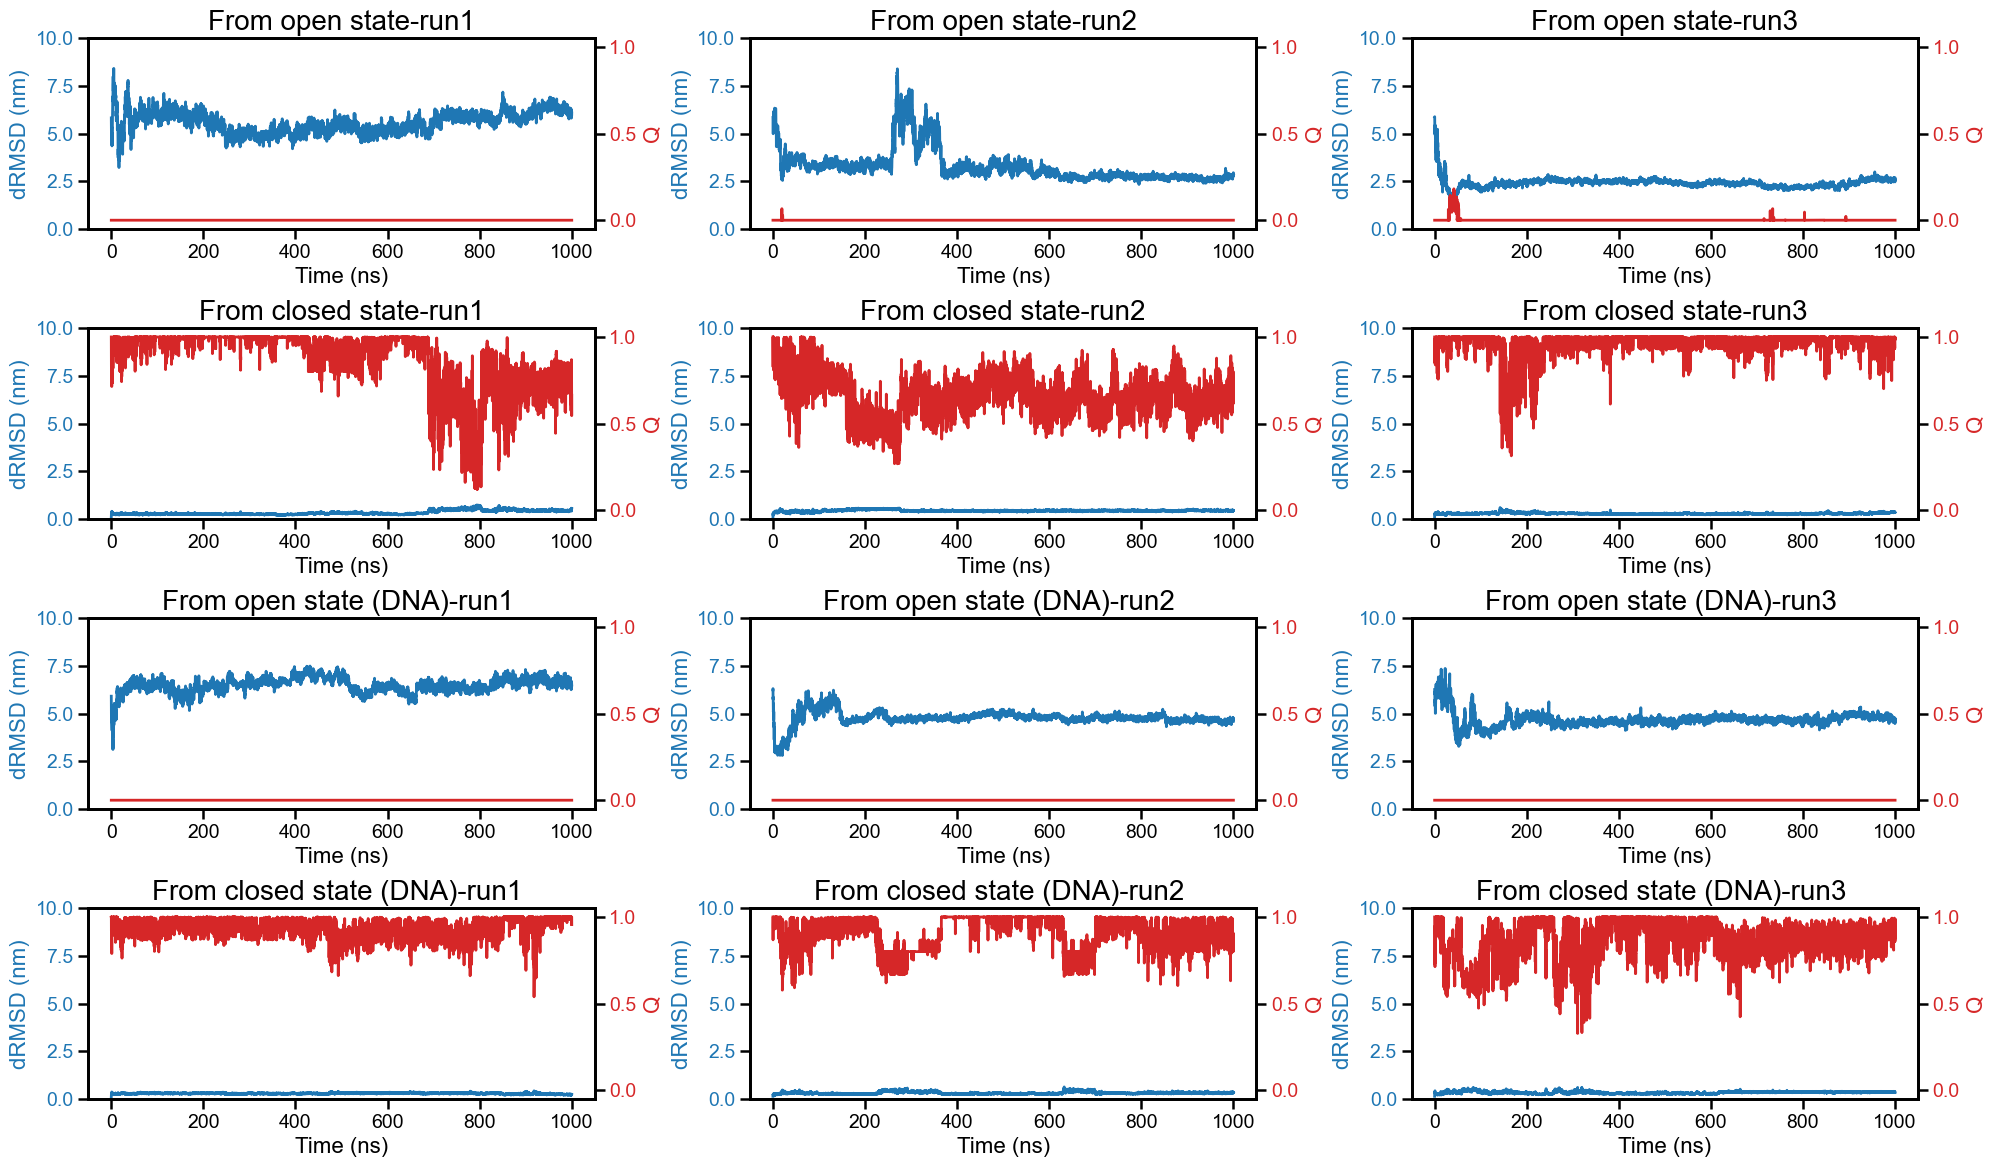

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 更新全局绘图风格
plt.rcParams.update({
    'font.family': 'Arial',  # 设置字体
    'axes.titlesize': 18,  # 标题字体大小
    'axes.labelsize': 16,  # 坐标轴标签字体大小
    'xtick.labelsize': 14,  # X轴刻度字体大小
    'ytick.labelsize': 14,  # Y轴刻度字体大小
    'legend.fontsize': 16,  # 图例字体大小
    'figure.figsize': (20, 12),  # 图像大小，适合6个子图
    'axes.linewidth': 2,  # 坐标轴线宽
    'xtick.major.size': 7, # x 轴主刻度长度
    'ytick.major.size': 7, # y 轴主刻度长度
    'xtick.minor.size': 4, # x 轴次刻度长度
    'ytick.minor.size': 4, # y 轴次刻度长度
    'xtick.major.width': 1.8, # x 轴主刻度线宽
    'ytick.major.width': 1.8, # y 轴主刻度线宽
    'xtick.minor.width': 1.5, # x 轴次刻度线宽
    'ytick.minor.width': 1.5, # y 轴次刻度线宽
    'axes.grid': False,  # 关闭背景网格
})

# 定义文件路径
file_paths = [
    '/data/jychen/MD_projects/SMC/All_Atoms/normalMD/Fullpro+1protonating_initSMD/analysis/dRMSD_plus_Q/1/colvar',
    '/data/jychen/MD_projects/SMC/All_Atoms/normalMD/Fullpro+1protonating_initSMD/analysis/dRMSD_plus_Q/2/colvar',
    '/data/jychen/MD_projects/SMC/All_Atoms/normalMD/Fullpro+1protonating_initSMD/analysis/dRMSD_plus_Q/3/colvar',
    '/data/jychen/MD_projects/SMC/All_Atoms/normalMD/Fullpro+1protonating/analysis/dRMSD_plus_Q/1/colvar',
    '/data/jychen/MD_projects/SMC/All_Atoms/normalMD/Fullpro+1protonating/analysis/dRMSD_plus_Q/2/colvar',
    '/data/jychen/MD_projects/SMC/All_Atoms/normalMD/Fullpro+1protonating/analysis/dRMSD_plus_Q/3/colvar',
    '/data/jychen/MD_projects/SMC/All_Atoms/normalMD/Fullpro_DNA+1protonating_initSMD/analysis/dRMSD_plus_Q/1/colvar',
    '/data/jychen/MD_projects/SMC/All_Atoms/normalMD/Fullpro_DNA+1protonating_initSMD/analysis/dRMSD_plus_Q/2/colvar',
    '/data/jychen/MD_projects/SMC/All_Atoms/normalMD/Fullpro_DNA+1protonating_initSMD/analysis/dRMSD_plus_Q/3/colvar',
    '/data/jychen/MD_projects/SMC/All_Atoms/normalMD/Fullpro_DNA+1protonating/analysis/dRMSD_plus_Q/1/colvar',
    '/data/jychen/MD_projects/SMC/All_Atoms/normalMD/Fullpro_DNA+1protonating/analysis/dRMSD_plus_Q/2/colvar',
    '/data/jychen/MD_projects/SMC/All_Atoms/normalMD/Fullpro_DNA+1protonating/analysis/dRMSD_plus_Q/3/colvar'
]

# 定义子图标题
subplot_titles = [
    'From open state-run1',
    'From open state-run2',
    'From open state-run3',
    'From closed state-run1',
    'From closed state-run2',
    'From closed state-run3',
    'From open state (DNA)-run1 ',
    'From open state (DNA)-run2 ',
    'From open state (DNA)-run3 ',
    'From closed state (DNA)-run1 ',
    'From closed state (DNA)-run2 ',
    'From closed state (DNA)-run3 ',
]

# 创建2行3列的子图布局
fig, axes = plt.subplots(4, 3, figsize=(20, 12))
axes = axes.flatten()  # 将2D数组展平为1D，便于索引

# 定义颜色
color_drmsd = 'tab:blue'
color_q = 'tab:red'

# 存储第一个子图的线条用于图例
legend_lines = []

# 为每个子图读取和绘制数据
for i, (file_path, title, ax) in enumerate(zip(file_paths, subplot_titles, axes)):
    # 读取数据文件，跳过以#开头的行
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            if not line.startswith('#'):
                values = line.strip().split()
                if len(values) >= 3:  # 确保行有足够的列
                    data.append([float(values[0]), float(values[1]), float(values[2])])
    
    # 转换为numpy数组便于处理
    data = np.array(data)
    
    time = data[:, 0] / 1000  # 第一列：时间（转换为ns）
    drmsd = data[:, 1]        # 第二列：dRMSD
    q = data[:, 2]            # 第三列：Q
    
    # 绘制dRMSD曲线
    ax.set_title(title, fontsize=20)
    ax.set_xlabel('Time (ns)')
    ax.set_ylabel('dRMSD (nm)', color=color_drmsd)
    line1, = ax.plot(time, drmsd, color=color_drmsd, label='dRMSD', linewidth=2)
    ax.tick_params(axis='y', labelcolor=color_drmsd)
    ax.set_ylim(0, 10)
    
    # 创建第二个Y轴
    ax2 = ax.twinx()
    
    # 绘制Q曲线
    ax2.set_ylabel('Q', color=color_q)
    line2, = ax2.plot(time, q, color=color_q, label='Q', linewidth=2)
    ax2.tick_params(axis='y', labelcolor=color_q)
    ax2.set_ylim(-0.05, 1.05)
    
    # 只从第一个子图收集线条用于图例
    if i == 0:
        legend_lines = [line1, line2]

# 添加图例到整个图的底部
#fig.legend(legend_lines, ['dRMSD', 'Q'], 
#           loc='lower center', bbox_to_anchor=(0.5, 0.02), 
#           ncol=2, fontsize=18)

# 调整布局
plt.tight_layout()
plt.subplots_adjust(bottom=0.08)  # 为底部的图例预留空间

# 保存图表到文件
plt.savefig('dRMSD_Q_comparison.png', dpi=300, bbox_inches='tight')
# 显示图表
plt.show()

